<a href="https://colab.research.google.com/github/Minautee/Spam-Mail-Detection/blob/master/spam_mail_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Program to detect if an email is spam or ham**

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [ ]:
df= pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.shape

(5171, 4)

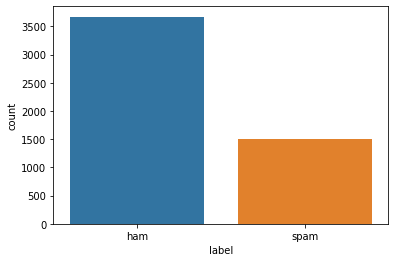

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='label', data=df)

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(5171, 4)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def  process_text (text):

  #1 Remove Punctuation
  #2 Remove stopwords
  #3 Return a list of clean text words

  #1
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  #2
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  spamwords=[word for word in nopunc.split() if word.lower in stopwords.words('english')]
  #3
  return clean_words

In [ ]:
df['text'].head().apply(process_text)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: text, dtype: object

In [ ]:
#example for what is to be done to the dataset
message4 = 'hello hello minautee text world hello'
message5 = 'test done test pending dia done test'
message6 = 'spam detection'
print(message4,message5)
print()

from sklearn.feature_extraction.text import CountVectorizer
bow4 = CountVectorizer(analyzer= process_text).fit_transform([[message4],[message5],[message6]])
print(bow4)
print()

print(bow4.shape) #(number of imputs and number of unique words)


hello hello minautee text world hello test done test pending dia done test

  (0, 3)	3
  (0, 4)	1
  (0, 8)	1
  (0, 9)	1
  (1, 7)	3
  (1, 2)	2
  (1, 5)	1
  (1, 1)	1
  (2, 6)	1
  (2, 0)	1

(3, 10)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer (analyzer=process_text).fit_transform(df['text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['label'], test_size=0.20, random_state=0)

In [ ]:
messages_bow.shape

(5171, 50381)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [ ]:
print(classifier.predict(X_train))
print(y_train.values)

['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      2940
        spam       0.98      0.97      0.98      1196

    accuracy                           0.99      4136
   macro avg       0.99      0.98      0.98      4136
weighted avg       0.99      0.99      0.99      4136


Confusion Matrix: 
 [[2918   22]
 [  30 1166]]

Accuracy:  0.9874274661508704


In [ ]:
print(classifier.predict(X_test))
print(y_test.values)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       732
        spam       0.95      0.96      0.96       303

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035


Confusion Matrix: 
 [[718  14]
 [ 13 290]]

Accuracy:  0.9739130434782609


[[718  14]
 [ 13 290]]


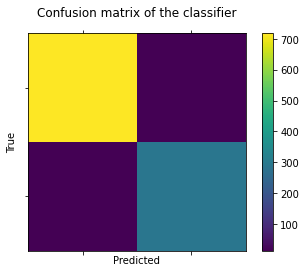

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()